# Prepare our environment

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
%matplotlib inline
pd.__version__

'1.2.5'

In [4]:
pd.options.display.float_format = '{:,.3f}'.format
np.set_printoptions(precision=3)

# Load our clean dataset

In [2]:
path_file = 'clean_data_car.csv'
path_file

'clean_data_car.csv'

In [5]:
df_cars = pd.read_csv(path_file)
df_cars.head()

,symboling,normalized-losses,make,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,...,stroke,compression-ratio,horsepower,peak-rpm,city-l/100km,highway-l/100km,price,horsepower_binned,fuel_type_diesel,fuel_type_gas
0,3,122,alfa-romero,std,two,convertible,rwd,front,88.600,0.811,...,2.680,9.000,111,"5,000.000",11.190,8.704,"13,495.000",Low,0,1
1,3,122,alfa-romero,std,two,convertible,rwd,front,88.600,0.811,...,2.680,9.000,111,"5,000.000",11.190,8.704,"16,500.000",Low,0,1
2,1,122,alfa-romero,std,two,hatchback,rwd,front,94.500,0.823,...,3.470,9.000,154,"5,000.000",12.368,9.038,"16,500.000",Medium,0,1
3,2,164,audi,std,four,sedan,fwd,front,99.800,0.849,...,3.400,10.000,102,"5,500.000",9.792,7.833,"13,950.000",Low,0,1
4,2,164,audi,std,four,sedan,4wd,front,99.400,0.849,...,3.400,8.000,115,"5,500.000",13.056,10.682,"17,450.000",Low,0,1


In [6]:
df_cars.describe()

,symboling,normalized-losses,wheel-base,length,width,height,curb-weight,engine-size,bore,stroke,compression-ratio,horsepower,peak-rpm,city-l/100km,highway-l/100km,price,fuel_type_diesel,fuel_type_gas
count,201.000,201.000,201.000,201.000,201.000,201.000,201.000,201.000,201.000,201.000,201.000,201.000,201.000,201.000,201.000,201.000,201.000,201.000
mean,0.841,122.000,98.797,0.837,0.915,0.899,"2,555.667",126.876,3.331,3.257,10.164,103.403,"5,117.665",9.944,8.045,"13,207.129",0.100,0.900
std,1.255,31.996,6.066,0.059,0.029,0.041,517.297,41.547,0.268,0.316,4.005,37.366,478.114,2.535,1.841,"7,947.066",0.300,0.300
min,-2.000,65.000,86.600,0.678,0.837,0.799,"1,488.000",61.000,2.540,2.070,7.000,48.000,"4,150.000",4.796,4.352,"5,118.000",0.000,0.000
25%,0.000,101.000,94.500,0.802,0.890,0.870,"2,169.000",98.000,3.150,3.110,8.600,70.000,"4,800.000",7.833,6.912,"7,775.000",0.000,1.000
50%,1.000,122.000,97.000,0.832,0.910,0.905,"2,414.000",120.000,3.310,3.290,9.000,95.000,"5,125.369",9.792,7.833,"10,295.000",0.000,1.000
75%,2.000,137.000,102.400,0.882,0.925,0.928,"2,926.000",141.000,3.580,3.410,9.400,116.000,"5,500.000",12.368,9.400,"16,500.000",0.000,1.000
max,3.000,256.000,120.900,1.000,1.000,1.000,"4,066.000",326.000,3.940,4.170,23.000,262.000,"6,600.000",18.077,14.688,"45,400.000",1.000,1.000


In [11]:
df_cars.describe(include = 'object')

,make,aspiration,num-of-doors,body-style,drive-wheels,engine-location,engine-type,num-of-cylinders,fuel-system,horsepower_binned
count,201,201,201,201,201,201,201,201,201,201
unique,22,2,2,5,3,2,6,7,8,3
top,toyota,std,four,sedan,fwd,front,ohc,four,mpfi,Low
freq,32,165,115,94,118,198,145,157,92,153


## Search variables to make predictions

In [17]:
df_cars.corr()[['price']].sort_values(by = 'price', ascending=False).T

,price,engine-size,curb-weight,horsepower,highway-l/100km,city-l/100km,width,length,wheel-base,bore,height,normalized-losses,fuel_type_diesel,stroke,compression-ratio,symboling,peak-rpm,fuel_type_gas
price,1.000,0.872,0.834,0.810,0.801,0.790,0.751,0.691,0.585,0.543,0.135,0.134,0.110,0.082,0.071,-0.082,-0.102,-0.110


### Numerical variables

#### engine-size

(0.0, 53345.17554304522)

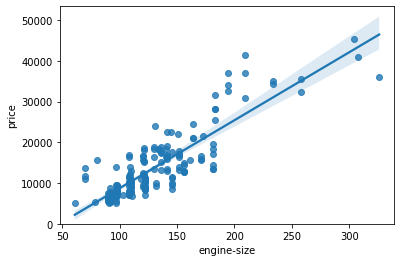

In [73]:
sns.regplot(x = 'engine-size', y = 'price', data = df_cars)
plt.ylim(0,)

# yes

#### curb-weight

(0.0, 47757.209706581634)

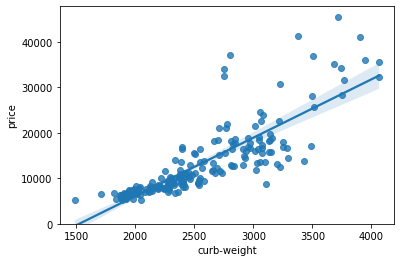

In [74]:
sns.regplot(x = 'curb-weight', y = 'price', data = df_cars)
plt.ylim(0,)

# yes

#### horsepower

(0.0, 47539.92430220936)

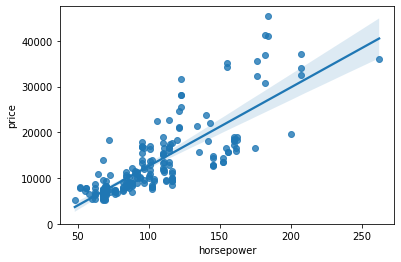

In [75]:
sns.regplot(x = 'horsepower', y = 'price', data = df_cars)
plt.ylim(0,)

# yes

#### highway-l/100km

(0.0, 47717.42305048999)

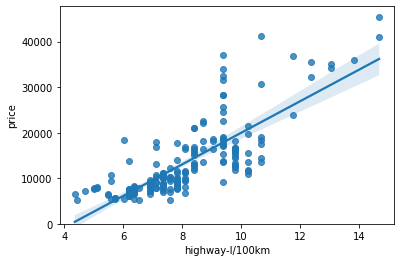

In [76]:
sns.regplot(x = 'highway-l/100km', y = 'price', data = df_cars)
plt.ylim(0,)

# yes

#### peak-rpm

(0.0, 47414.1)

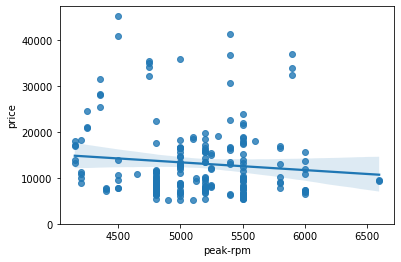

In [77]:
sns.regplot(x = 'peak-rpm', y = 'price', data = df_cars)
plt.ylim(0,)

# no

### Categorical Variables

In [24]:
df_cars.describe(include = 'object')

,make,aspiration,num-of-doors,body-style,drive-wheels,engine-location,engine-type,num-of-cylinders,fuel-system,horsepower_binned
count,201,201,201,201,201,201,201,201,201,201
unique,22,2,2,5,3,2,6,7,8,3
top,toyota,std,four,sedan,fwd,front,ohc,four,mpfi,Low
freq,32,165,115,94,118,198,145,157,92,153


#### body-style

(0.0, 47414.1)

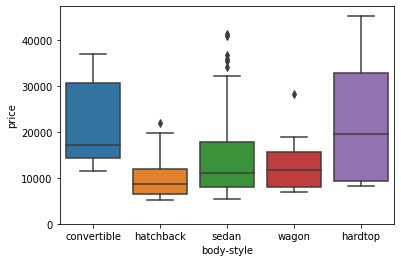

In [78]:
sns.boxplot(x = 'body-style', y = 'price', data = df_cars)
plt.ylim(0,)

# no

#### engine-location

(0.0, 47414.1)

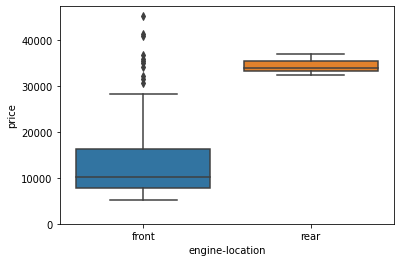

In [80]:
sns.boxplot(x = 'engine-location', y = 'price', data = df_cars)
plt.ylim(0,)

# yes

#### num-of-doors

(0.0, 47414.1)

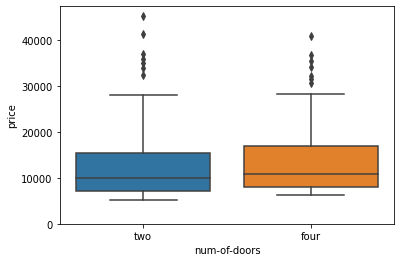

In [81]:
sns.boxplot(x = 'num-of-doors', y = 'price', data = df_cars)
plt.ylim(0,)

# no

#### drive-wheels

(0.0, 47414.1)

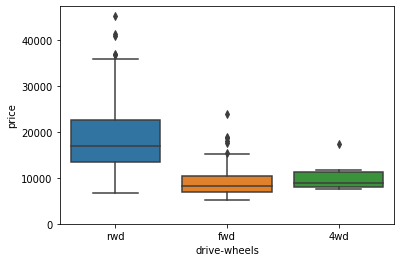

In [82]:
sns.boxplot(x = 'drive-wheels', y = 'price', data = df_cars)
plt.ylim(0,)

# no

In [89]:
# group - price by body-style
df_cars.groupby(['body-style'])[['price']].mean().reset_index().sort_values(by = 'price', ascending = False)

,body-style,price
1,hardtop,"22,208.500"
0,convertible,"21,890.500"
3,sedan,"14,459.755"
4,wagon,"12,371.960"
2,hatchback,"9,957.441"


In [93]:
# price by body-style and drive-wheels
df_group_pr_b_dr = df_cars[['price', 'body-style', 'drive-wheels']]
df_group_pr_b_dr.groupby(['drive-wheels', 'body-style'], as_index = False).mean()

,drive-wheels,body-style,price
0,4wd,hatchback,"7,603.000"
1,4wd,sedan,"12,647.333"
2,4wd,wagon,"9,095.750"
3,fwd,convertible,"11,595.000"
4,fwd,hardtop,"8,249.000"
5,fwd,hatchback,"8,396.388"
6,fwd,sedan,"9,811.800"
7,fwd,wagon,"9,997.333"
8,rwd,convertible,"23,949.600"
9,rwd,hardtop,"24,202.714"


In [103]:
# pivor this table to have a better knowledge
df_group = df_group_pr_b_dr.groupby(['drive-wheels', 'body-style'], as_index = False).mean()
df_group_pivot = pd.pivot(data = df_group, columns = 'body-style', index = 'drive-wheels', values = 'price')
df_group_pivot

body-style,convertible,hardtop,hatchback,sedan,wagon
drive-wheels,,,,,
4wd,NaN,NaN,"7,603.000","12,647.333","9,095.750"
fwd,"11,595.000","8,249.000","8,396.388","9,811.800","9,997.333"
rwd,"23,949.600","24,202.714","14,337.778","21,711.833","16,994.222"


In [104]:
df_group_pivot.fillna(0, inplace = True)
df_group_pivot

body-style,convertible,hardtop,hatchback,sedan,wagon
drive-wheels,,,,,
4wd,0.000,0.000,"7,603.000","12,647.333","9,095.750"
fwd,"11,595.000","8,249.000","8,396.388","9,811.800","9,997.333"
rwd,"23,949.600","24,202.714","14,337.778","21,711.833","16,994.222"


In [110]:
df_group_pivot.sort_values(by = 'drive-wheels', ascending = False, inplace = True)

<AxesSubplot:xlabel='body-style', ylabel='drive-wheels'>

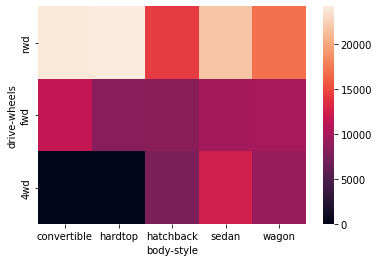

In [111]:
sns.heatmap(df_group_pivot)

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=fabb4e41-fcd2-4421-bbfb-772986975631' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>